In [74]:
from keras.models import load_model, Model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as p
import json
import os

In [3]:
regressor = load_model('/mnt/disks/gscratch/regressor_redo2_epoch4.h5')
classifier = load_model('/mnt/disks/gscratch/my_model2_epoch1.h5')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [80]:
ad_regress = Model(inputs=regressor.layers[0].input, outputs=regressor.layers[-2].output)
ad_class = Model(inputs=classifier.layers[0].input, outputs=classifier.layers[-3].output)

In [57]:
# -----try out on val images-----
img_dir = '/mnt/disks/gscratch/val/'
img = os.listdir(img_dir)
lab = open('/mnt/disks/gscratch/bdd100k_labels_images_val.json', 'rb').read().decode('utf8')
labels = json.loads(lab)

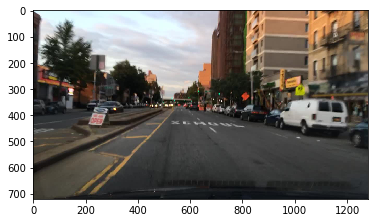

In [59]:
test_num = 0
test_img = plt.imread(img_dir + labels[test_num]['name'])

In [85]:
c = ad_class.predict(np.reshape(test_img, (1, 720, 1280, 3)))

In [96]:
r = ad_regress.predict(np.reshape(test_img, (1, 720, 1280, 3)))

In [97]:
ad_regress.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
model_1 (Model)              (None, None, None, 512)   1415808   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 1024)  189268992 
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 2048)  2099200   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 1024)  2098176   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 4)     4100      
Total params: 194,886,276
Trainable params: 193,470,468
Non-trainable params: 1,415,808
______________________________________________________

In [100]:
x_test = np.load('/mnt/disks/gscratch/5g/5g/test_img_pixnum2000_0.npy')
y_test = np.load('/mnt/disks/gscratch/5g/5g/test_bbox_pixnum2000_0.npy')

0.0 36.57142857142857 256.0 182.85714285714283
-267.96405 95.99898 -9262.785 -11139.0625


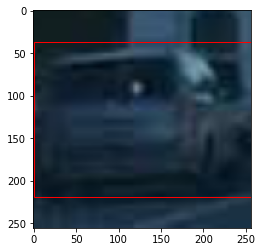

In [135]:
num = 25
fig, ax = plt.subplots()
ax.imshow(x_test[num])
x1 = y_test[num][0]
y1 = y_test[num][1]
dx = y_test[num][2]
dy = y_test[num][3]
print(x1, y1, dx, dy)
ax.add_patch(p.Rectangle((x1, y1), dx, dy, linewidth=1, edgecolor='r', facecolor='None'))
y_pred = regressor.predict(np.reshape(x_test[num], (1, 256, 256 , 3)))
x1 = y_pred[0][0]
y1 = y_pred[0][1]
dx = y_pred[0][2]
dy = y_pred[0][3]
print(x1, y1, dx, dy)
ax.add_patch(p.Rectangle((x1, y1), dx, dy, linewidth=1, edgecolor='b', facecolor='None'))